In [1]:
import requests
from PIL import Image
import cv2
from keras.preprocessing import image
from io import BytesIO
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
import json

Using TensorFlow backend.


In [2]:
# test image
img_path = './7012-187.jpg'
img = cv2.imread(img_path)
width, height, _ = img.shape

In [4]:
# local test
url = 'http://localhost:8090/score'
with open(img_path, "rb") as image_file:

    headers = {"Content-Type":"image/jpeg", "Accept":"application/json"}

    r = requests.post(url, headers =headers, data=image_file.read())
    
    if r.status_code == 200:
        res = r.json()
        print(res)
    else:
        print("error!!!")


{'inferences': [{'type': 'entity', 'entity': {'tag': {'value': 'crack', 'confidence': 0.8791594505310059}, 'box': {'l': 0.06770500818888346, 't': 0.007347822189331055, 'w': 0.8670028368631999, 'h': 0.5681711292266846}}}]}


Predicted boxes:

	class	conf	xmin	ymin	xmax	ymax
	crack	0.88	17	2	239	147


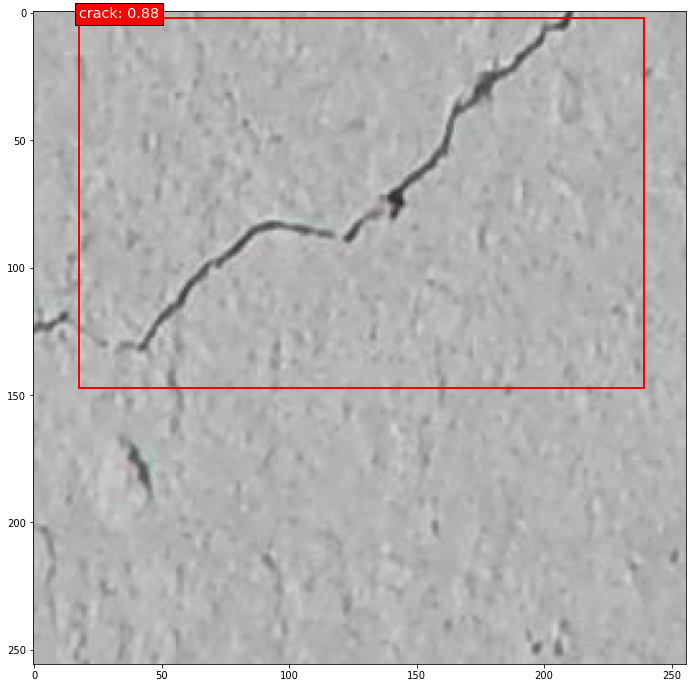

In [6]:
orig_images = []

orig_images.append(imread(img_path))

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('\tclass\tconf\txmin\tymin\txmax\tymax')
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
classes = ['background','crack','noncrack']

plt.figure(figsize=(20,12))
plt.imshow(orig_images[0])

current_axis = plt.gca()

for p in res["inferences"]:
    tag = p['entity']['tag']['value']
    conf = p['entity']['tag']['confidence']
    xmin = p['entity']['box']['l']*width
    ymin = p['entity']['box']['t']*height
    xmax = (p['entity']['box']['w'])*width + xmin
    ymax = (p['entity']['box']['h'])*height + ymin

    print('\t{}\t{:.2f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}'.format(tag, conf, xmin, ymin, xmax, ymax))

    color = colors[0]
    label = '{}: {:.2f}'.format(tag, conf)
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})